# 1-this is a visual for train valid and test for omega--net

## 1-1 this is for train analysis
the tensor in the real_data
info={
                    'freq_index':[51]
                    'pred_freq_distribution':,[batch,51,2]\
                    'real_freq_distribution':,[batch，51，2]\
                    "pred_data":soft_freq_index,[batch,100,2]\
                    "real_data":soft_omega,[batch,100,2]\
                    "left_matrix":,[batch,100,102,2]\100 is t_steps
                    "pred_coeff":,[batch,102,2]
                    "labels":[batch]

      }

In [13]:
import matplotlib as mpl
import os
from tensorboard.backend.event_processing import event_accumulator
import torch
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "STIXGeneral"
title_size=25
label_size=20
mpl.rcParams['font.size'] = label_size
mpl.rcParams['axes.titlesize'] = title_size

In [109]:
def plot_loss(path, loss_train, x_log=False):

    """
    Plot loss.
    Args:
        path (str): path.
        loss_train (list): list of training loss.
        x_log (bool): whether to use log scale for x-axis.
    Returns:
        None.
    """
    plt.figure()
    ax = plt.gca()
    y2 = np.asarray(loss_train)
    plt.plot(y2, 'k-', label='Train')
    plt.xlabel('epoch', fontsize=18)
    ax.tick_params(labelsize=18)
    plt.yscale('log')
    if x_log == False:
        fntmp = os.path.join(path, 'loss.png')

    else:
        plt.xscale('log')
        fntmp = os.path.join(path, 'loss_log.png')
    plt.tight_layout()
    plt.savefig(fntmp,dpi=300)

    plt.close()
def plot_model_output(path, args, output, epoch):

    plt.figure()
    ax = plt.gca()

    plt.plot(args.training_input.detach().cpu().numpy(),
             args.training_target.detach().cpu().numpy(), 'b*', label='True')
    plt.plot(args.test_input.detach().cpu().numpy(),
             output.detach().cpu().numpy(), 'r-', label='Test')

    ax.tick_params(labelsize=18)
    plt.legend(fontsize=18)
    fntmp = os.path.join(path, 'output', str(epoch)+'.png')

    plt.savefig(fntmp, dpi=300)


    plt.close()
def my_fft(data, freq_len=40, isnorm=1):

    """
    This function performs FFT on the given data.

    Args:
    data (numpy.ndarray): The input data.
    freq_len (int): The length of the frequency.
    isnorm (int): The normalization factor.

    Returns:
    return_fft (numpy.ndarray): The FFT output array.
    """

    # second_diff_input = np.mean(np.diff(np.diff(np.squeeze(x_input))))
    # if abs(second_diff_input) < 1e-10:
    datat = np.squeeze(data)
    datat_fft = np.fft.fft(datat)
    ind2 = range(freq_len)
    fft_coe = datat_fft[ind2]
    if isnorm == 1:
        return_fft = np.absolute(fft_coe)
    else:
        return_fft = fft_coe

    return return_fft
def SelectPeakIndex(FFT_Data, endpoint=True):

    """
    This function selects the peak index from FFT data.

    Args:
    FFT_Data (numpy.ndarray): The FFT data array.
    endpoint (bool): Whether to include endpoints or not. Default is True.

    Returns:
    sel_ind (numpy.ndarray): Selected index array with peaks.
    """

    D1 = FFT_Data[1:-1]-FFT_Data[0:-2]
    D2 = FFT_Data[1:-1]-FFT_Data[2:]
    D3 = np.logical_and(D1 > 0, D2 > 0)
    tmp = np.where(D3 == True)
    sel_ind = tmp[0]+1
    if endpoint: #
        if FFT_Data[0]-FFT_Data[1] > 0:
            sel_ind = np.concatenate([[0], sel_ind])
        if FFT_Data[-1]-FFT_Data[-2] > 0:
            Last_ind = len(FFT_Data)-1
            sel_ind = np.concatenate([sel_ind, [Last_ind]])
    return sel_ind
def plot_freq_distr(**kwargs):
    """
    Plot frequency distribution and the heatmap of the given training target and output.

    Args:
    args: A dictionary containing training target and output.

    Returns:
    None
    """
    freq_index=kwargs["freq_index"]
    P_freq_data=kwargs["pred_freq_distribution"]
    R_freq_data=kwargs["real_freq_distribution"]
    target_data=kwargs["target_data"]
    pred_data=kwargs["pred_data"]
    data_t=kwargs["data_t"]
    epoch=kwargs["epoch"]

    fig, ax = plt.subplots(1, 3, figsize=(18, 8))

    ax[0].semilogy(freq_index,R_freq_data[0,:,0]+1e-10, label='Real data')
    idx = SelectPeakIndex(R_freq_data[0,:,0], endpoint=False)
    ax[0].semilogy(freq_index[idx], R_freq_data[0,idx,0], '*',label='Real peak')

    ax[0].semilogy(freq_index,P_freq_data[0,:,0]+1e-10, label='Model predict',linestyle='--')
    idx = SelectPeakIndex(P_freq_data[0,:,0], endpoint=False)
    ax[0].semilogy(freq_index[idx], P_freq_data[0,idx,0], 'o',label='Pred peak')
    ax[0].legend(fontsize=12)
    ax[0].set_xlabel('freq idx', fontsize=22)
    ax[0].set_ylabel('Log sclae of intensity', fontsize=22)
    ax[0].set_title("Compare the FFT of real and predict", fontsize=22)

    plt.xlabel('freq idx', fontsize=22)
    plt.ylabel('freq', fontsize=22)
    plt.gca().tick_params(axis='y', labelsize=22)
    plt.gca().tick_params(axis='x', labelsize=22)

    for spine in ['top', 'bottom', 'left', 'right']:
        ax[0].spines[spine].set_color('black')
        ax[0].spines[spine].set_linewidth(2)

    #plot the sequence
    ax[1].plot(data_t, target_data[0,:,0], label='Real data',linewidth=2)
    ax[1].plot(data_t, pred_data[0,:,0], label='Model predict',linewidth=2,linestyle='--',color='green')
    ax[1].legend(loc="upper right",fontsize=12)
    ax[1].set_xlabel('time', fontsize=22)
    ax[1].set_ylabel('value', fontsize=22)
    ax[1].set_title("Compare the time sequence of real and predict", fontsize=22)

    for spine in ['top', 'bottom', 'left', 'right']:
        ax[1].spines[spine].set_color('black')
        ax[1].spines[spine].set_linewidth(2)
    #plot the phase-plane
    ax[2].plot(target_data[0,:,0], target_data[0,:,1], label='Real data',linewidth=2)
    ax[2].plot(pred_data[0,:,0], pred_data[0,:,1], label='Model predict',linewidth=2,linestyle='--',color='green')
    ax[2].legend(loc="upper right",fontsize=12)
    ax[2].set_xlabel('y1', fontsize=22)
    ax[2].set_ylabel('y2', fontsize=22)
    ax[2].set_title("Compare the phase-plane of real and predict", fontsize=22)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax[2].spines[spine].set_color('black')
        ax[2].spines[spine].set_linewidth(2)
    plt.tight_layout()
    plt.savefig(f"freq_distr_time_compare_{epoch}.png", bbox_inches='tight')


In [110]:
def search_files_info(directory_path="train_process/omega_net/tb_event"):
    '''
    params: input:path
    return list of name
    '''
    # List all files in the directory
    file_names = [f for f in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, f))]
    #print(file_names)
    return file_names
def dict_process(folder_path="expr2_1_results/expr2_1_2_data/"):
    # search the files_info abput event
    train_process_directory = "train_process/inference_net/tb_event/train_process_inference_loss/"
    valid_process_u_directory = "valid_process/inference_net/tb_event/valid_process_eval_u_stat_data/"
    valid_process_mse_directory = "valid_process/inference_net/tb_event/valid_process_eval_mse_loss/"
    test_process_mse_directory = "test_process/inference_net/tb_event/test_process_eval_mse_loss/"
    valid_process_mae_directory = "valid_process/inference_net/tb_event/valid_process_eval_mae/"
    test_process_u_directory = "test_process/inference_net/tb_event/test_process_eval_u_stat_data/"
    valid_process_fourier_directory = "valid_process/inference_net/tb_event/valid_process_eval_freq_loss/"

    name_4value = {"train_process": folder_path + train_process_directory,
                   "valid_u": folder_path + valid_process_u_directory,
                   "valid_mse": folder_path + valid_process_mse_directory,
                   "valid_fourier": folder_path + valid_process_fourier_directory,
                   "valid_mae": folder_path + valid_process_mae_directory,
                   "test_u": folder_path + test_process_u_directory,
                   "test_mse": folder_path + test_process_mse_directory}

    dict_loss = {"train_process": [],
                 "valid_u": [],
                 "valid_mse": [],
                 "valid_fourier": [],
                 "valid_mae": [],
                 "test_mse": [],
                 "test_u": []}

    for i, key in enumerate(name_4value.keys()):
        #load tensorboard
        event_list_path = search_files_info(name_4value[key])
        ea = event_accumulator.EventAccumulator(name_4value[key] + event_list_path[0])
        #print(name_4value[key] + event_list_path[0])
        ea.Reload()
        name = ea.scalars.Keys()[0]
        steps = len(ea.scalars.Items(name))

        loss_array = []
        for i in range(steps):
            dict_loss[key].append(ea.scalars.Items(name)[i].value)

    return dict_loss
#plot for the loss
def save_loss_visual(folder_path):
    fig, ax = plt.subplots(figsize=(12, 8))
    dict_loss = dict_process(folder_path)

    for key, value in dict_loss.items():

        if key == "test_mse" or key == "test_u" or key == "valid_u" or key == "train_process":
            continue
        else:
            ax.plot(np.log10(dict_loss[key]), label="$log" + "_{10}$" + key)

        ax.set_xlabel("epoch", fontsize=20)
        ax.set_ylabel("loss(log)", fontsize=20)

    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_color('black')
        ax.spines[spine].set_linewidth(2)

    # 显示图形
    ax.legend(loc="upper right")
    ax.set_title("Loss Comprare in valid ")
    ax.grid(True)
    plt.tight_layout()
    plt.savefig(f"loss_compare_VALID.png", bbox_inches='tight')

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
def plot_tensor_on_heatmap(epoch,tensor):
    num_cols = 6
    num_rows = 101  # The number of rows in each heatmap basis
    data_columns = 2  # The number of data columns in each heatmap
    fig, axes = plt.subplots(1, num_cols, figsize=(num_cols * 3, 6))

    for i in range(num_cols):
        for j in range(data_columns):
            # Plot heatmap for each column
            heatmap_data = tensor[i, :, j].reshape(-1, 1)
            cax = axes[i].imshow(heatmap_data, cmap='RdBu_r', interpolation='nearest', aspect='auto', vmin=-5, vmax=5)

        # Customize subplot

        axes[i].set_title(f"Heatmap of Coefficients on functions _{i}",fontsize=10)
        axes[i].set_xlabel("Signal", fontsize=14)
        axes[i].set_xlim(-0.5, 0.5)
        axes[i].set_xticks([-0.25, 0.25])
        axes[i].set_xticklabels(['y1', 'y2'])
        axes[0].set_ylabel("Order Number of functions", fontsize=14)
        axes[i].axvline(0, color='black', linestyle='--', linewidth=1)  # Divider line

    # Add a colorbar for the heatmaps
    cbar_ax = fig.add_axes([0.3, 0.99, 0.4, 0.015])  # Position for the colorbar
    cbar = fig.colorbar(cax, cax=cbar_ax, orientation='horizontal',pad=0.07, fraction=0.01)
    cbar.ax.set_xlabel('Color Scale',fontsize=12)
    # Set overall title
    fig.suptitle(f"Show different coefficients of batch in epoch={epoch} ", fontsize=16,y=1.05)

    plt.tight_layout()

    plt.savefig(f"train{epoch}.png", bbox_inches='tight')
    plt.close()

In [112]:
def save_opertor_matrix(left_matrix):
    plt.imshow(left_matrix[0,:,1:102,1],cmap="RdBu_r",interpolation='nearest', aspect='auto', vmin=-1.1, vmax=1.1)
    plt.xlabel("Basis function", fontsize=14)
    plt.ylabel("Time", fontsize=14)
    plt.title("Operator Matrix")
    plt.colorbar()
    plt.savefig("operator_matrix.png", bbox_inches='tight')
    plt.close()

In [113]:
def pre_proess_savefig(folder_path,epoch=1):
    epoch = epoch
    string = f"{epoch}.pth"
    folder_path=folder_path
    train_process_path =folder_path+"train_process/inference_net/analysis_files/tensor_" + string
    Tensors_train_process = torch.load(train_process_path)
    Tensors_train_process.keys()
    #convert
    Plot_real=Tensors_train_process["real_data"].cpu().detach().numpy()
    Pred_data=Tensors_train_process["pred_data"].cpu().detach().numpy()
    target_data=Plot_real
    P_freq_data=Tensors_train_process["pred_freq_distribution"].cpu().detach().numpy()
    R_freq_data=Tensors_train_process["real_freq_distribution"].cpu().detach().numpy()
    data_t=np.linspace(0,2,100)
    freq_index=Tensors_train_process["freq_index"].cpu().detach().numpy()
    real_label=Tensors_train_process['labels'].numpy()
    left_matrix=Tensors_train_process["left_matrix"].cpu().detach().numpy()
    pred_coeffs=Tensors_train_process["pred_coeffs"].cpu().detach().numpy()
    plot_tensor_on_heatmap(epoch,tensor=pred_coeffs)
    save_opertor_matrix(left_matrix=left_matrix)#save matirx
    plot_freq_distr(freq_index=freq_index,
                pred_freq_distribution=P_freq_data,
                real_freq_distribution=R_freq_data,
                target_data=target_data,
                pred_data=Pred_data,
                data_t=data_t,
                epoch=epoch)
    save_loss_visual(folder_path=folder_path)


## save fig

In [114]:
folder_path="expr2_1_results/expr2_1_2_data/"

C:\Users\admin\AppData\Local\Temp\ipykernel_3304\2819947082.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


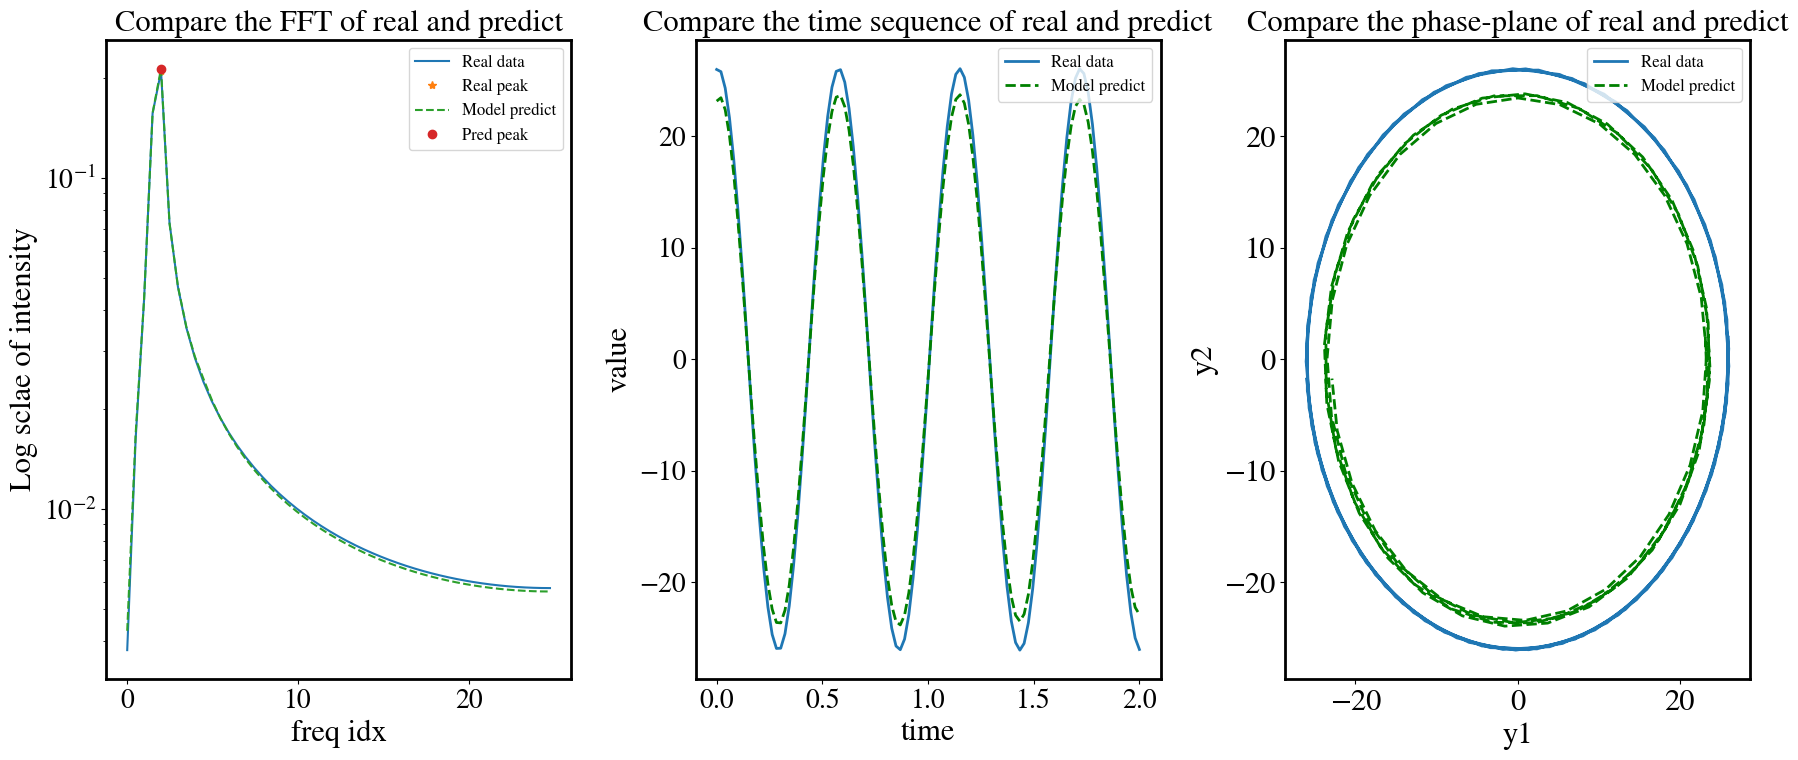

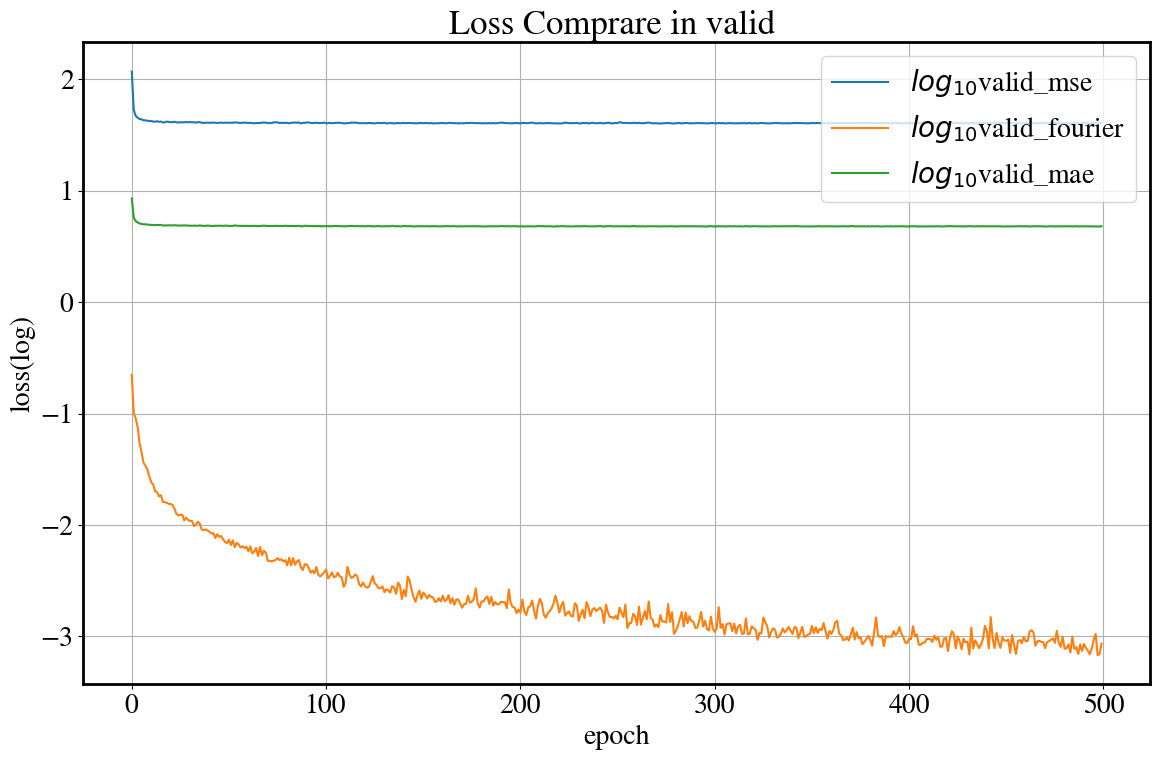

In [115]:
pre_proess_savefig(folder_path=folder_path,epoch=500)#plot_tensor_on_heatmap(epoch,tensor=pred_coeffs)


# 1.1 real_data omega analysis data

## 1.2 here we handle the loss visualization
loss visualize the train_loss and valid_Loss and test results
and we could handle the performace in the training the omega and data
#### train_process_directory="train_process/omega_net/tb_event/"
#### valid_process_u_directory="valid_process/omega_net/tb_event/valid_process_u_stat/"
#### valid_process_mse_directory="valid_process/omega_net/tb_event/valid_process_mse_loss/"
#### test_process_mse_directory="test_process/omega_net/tb_event/test_process_mse_loss/"
#### test_process_u_directory="test_process/omega_net/tb_event/test_process_u_stat/"
